<a href="https://colab.research.google.com/github/LLegler89/Portfolio/blob/main/Regression_functions_and_DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def process_and_regress(file_path, dependent_var):
    """
    Loads a dataset, cleans it by removing rows with missing values, and runs a linear regression.

    Args:
        file_path (str): The path to the dataset file.
        dependent_var (str): The name of the dependent variable.

    Returns:
        LinearRegression: The fitted linear regression model.
    """

    # Load dataset, inferring the delimiter based on the file
    df = pd.read_csv(file_path, delimiter=None, engine='python')

    # Drop rows with zeros, NaNs, or blank values in any column, including the dependent variable
    df = df.replace('', pd.NA)  # Replace blank values with NaNs to ensure they are caught
    df = df.dropna()

    # Separate the dependent variable from the independent variables
    X = df.drop(dependent_var, axis=1)
    y = df[dependent_var]

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    return model

# Example usage:
file_path = "/content/test1.csv"
dependent_variable = "Weight(lbs)"
model = process_and_regress(file_path, dependent_variable)

# You can now use the model to make predictions or examine its coefficients
# For example to view the coefficients
print(model.coef_)

[0.0237988  4.14020955]


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

def process_and_regress(file_path, dependent_var):
    """
    Loads a dataset, cleans it by removing rows with missing values,
    encodes the dependent variable if categorical and runs a linear regression.

    Args:
        file_path (str): The path to the dataset file.
        dependent_var (str): The name of the dependent variable.

    Returns:
        LinearRegression: The fitted linear regression model.
    """

    # Load dataset
    df = pd.read_csv(file_path, delimiter=None, engine='python')

    # Drop rows with zeros, NaNs, or blank values
    df = df.replace('', pd.NA)
    df = df.dropna()

    # Check if the dependent variable is numeric or categorical
    if pd.api.types.is_numeric_dtype(df[dependent_var]):
        print('The dependent variable is numeric. Proceeding without encoding.')
    else:
        print('The dependent variable is categorical. Encoding with LabelEncoder.')
        le = LabelEncoder()
        df[dependent_var] = le.fit_transform(df[dependent_var])

    # Separate the dependent variable from the independent variables
    X = df.drop(dependent_var, axis=1)
    y = df[dependent_var]

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    print(model.feature_names_in_,model.coef_)

    return model

# Example usage:
file_path = "/content/Blood_samples_dataset_balanced_2(f).csv"
dependent_variable = "Disease"
model = process_and_regress(file_path, dependent_variable)

The dependent variable is categorical. Encoding with LabelEncoder.
['Glucose' 'Cholesterol' 'Hemoglobin' 'Platelets' 'White Blood Cells'
 'Red Blood Cells' 'Hematocrit' 'Mean Corpuscular Volume'
 'Mean Corpuscular Hemoglobin' 'Mean Corpuscular Hemoglobin Concentration'
 'Insulin' 'BMI' 'Systolic Blood Pressure' 'Diastolic Blood Pressure'
 'Triglycerides' 'HbA1c' 'LDL Cholesterol' 'HDL Cholesterol' 'ALT' 'AST'
 'Heart Rate' 'Creatinine' 'Troponin' 'C-reactive Protein'] [-0.06881998  0.21677234  1.71366209 -0.97151753  1.27249326  1.87798735
  0.76301175 -0.55971482  0.76013807  0.47147138  1.13062176  0.97218499
 -1.00395141 -0.78954866 -0.5440856  -0.10847837 -1.63329435 -0.2648973
  0.44350211 -0.23923323 -0.8801499   0.60895293 -0.36475907  1.16518383]


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

def process_and_regress(file_path, dependent_var):
    """
    Loads a dataset, cleans it by removing rows with missing values,
    encodes the dependent variable if categorical and runs a linear regression.

    Args:
        file_path (str): The path to the dataset file.
        dependent_var (str): The name of the dependent variable.

    Returns:
        LinearRegression: The fitted linear regression model.
    """

    # Load dataset
    df = pd.read_csv(file_path, delimiter=None, engine='python')

    # Drop rows with zeros, NaNs, or blank values
    df = df.replace('', pd.NA)
    df = df.dropna()

    # Check if the dependent variable is numeric or categorical
    if pd.api.types.is_numeric_dtype(df[dependent_var]):
        print('The dependent variable is numeric. Proceeding without encoding.')
    else:
        print('The dependent variable is categorical. Encoding with LabelEncoder.')
        le = LabelEncoder()
        df[dependent_var] = le.fit_transform(df[dependent_var])

    # Separate the dependent variable from the independent variables
    X = df.drop(dependent_var, axis=1)
    y = df[dependent_var]
    # Fit the linear regression model (using statsmodels for p-values)
    X2 = sm.add_constant(X)  # Add a constant for the intercept
    model = sm.OLS(y, X2).fit()

    # Create the results table
    results_df = pd.DataFrame({
        'Variable': X.columns,
        'Coefficient': model.params[1:],
        'p-value': model.pvalues[1:]
    })

    return model, results_df


# Example usage:
file_path = "/content/Blood_samples_dataset_balanced_2(f).csv"
dependent_variable = "Disease"
model = process_and_regress(file_path, dependent_variable)


print(model)

The dependent variable is categorical. Encoding with LabelEncoder.
                                                                            Variable  \
Glucose                                                                      Glucose   
Cholesterol                                                              Cholesterol   
Hemoglobin                                                                Hemoglobin   
Platelets                                                                  Platelets   
White Blood Cells                                                  White Blood Cells   
Red Blood Cells                                                      Red Blood Cells   
Hematocrit                                                                Hematocrit   
Mean Corpuscular Volume                                      Mean Corpuscular Volume   
Mean Corpuscular Hemoglobin                              Mean Corpuscular Hemoglobin   
Mean Corpuscular Hemoglobin Concentration  Mean Corpu

In [ ]:
# Example usage:
file_path = "/content/Blood_samples_dataset_balanced_2(f).csv"
dependent_variable = "Disease"
model = process_and_regress(file_path, dependent_variable)

The dependent variable is categorical. Encoding with LabelEncoder.
['Glucose' 'Cholesterol' 'Hemoglobin' 'Platelets' 'White Blood Cells'
 'Red Blood Cells' 'Hematocrit' 'Mean Corpuscular Volume'
 'Mean Corpuscular Hemoglobin' 'Mean Corpuscular Hemoglobin Concentration'
 'Insulin' 'BMI' 'Systolic Blood Pressure' 'Diastolic Blood Pressure'
 'Triglycerides' 'HbA1c' 'LDL Cholesterol' 'HDL Cholesterol' 'ALT' 'AST'
 'Heart Rate' 'Creatinine' 'Troponin' 'C-reactive Protein'] [-0.06881998  0.21677234  1.71366209 -0.97151753  1.27249326  1.87798735
  0.76301175 -0.55971482  0.76013807  0.47147138  1.13062176  0.97218499
 -1.00395141 -0.78954866 -0.5440856  -0.10847837 -1.63329435 -0.2648973
  0.44350211 -0.23923323 -0.8801499   0.60895293 -0.36475907  1.16518383]


The dependent variable is categorical. Encoding with LabelEncoder.


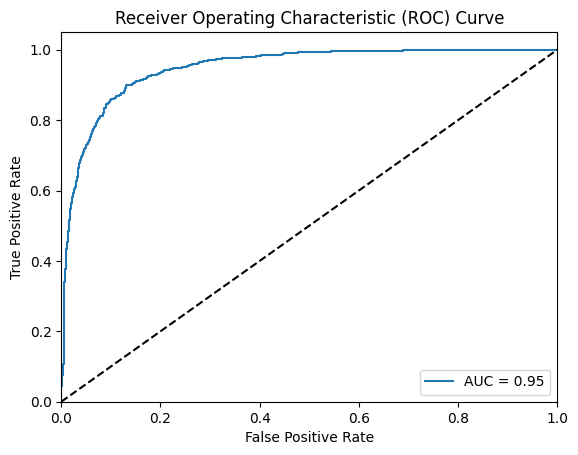

                Variable  Coefficient  p-value
const              const         0.69      0.0
Size                Size         0.08      0.0
Weight            Weight         0.10      0.0
Sweetness      Sweetness         0.08      0.0
Softness        Softness         0.01      0.0
HarvestTime  HarvestTime         0.06      0.0
Ripeness        Ripeness         0.06      0.0
Acidity          Acidity        -0.01      0.0


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def process_and_regress(file_path, dependent_var, test_size=0.25, random_state=42):
    """
    Loads a dataset, cleans it, encodes categorical dependent variables,
    runs a linear regression and outputs a table of coefficients and p-values.

    Args:
        file_path (str): Path to the dataset file.
        dependent_var (str): Name of the dependent variable.

    Returns:
        DataFrame: A table containing coefficients and p-values.
    """

    # Load dataset
    df = pd.read_csv(file_path, delimiter=None, engine='python')

    # Drop rows with zeros, NaNs, or blank values
    df = df.replace('', pd.NA)
    df = df.dropna()

    # Check and encode if dependent variable is categorical
    if pd.api.types.is_numeric_dtype(df[dependent_var]):
        print('The dependent variable is numeric. Proceeding without encoding.')
    else:
        print('The dependent variable is categorical. Encoding with LabelEncoder.')
        le = LabelEncoder()
        df[dependent_var] = le.fit_transform(df[dependent_var])

    # Separate dependent and independent variables
    X = df.drop(dependent_var, axis=1)
    y = df[dependent_var]
    X = sm.add_constant(X) # statsmodels requires a constant added to the independent variables

    # Test-train split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train = sm.add_constant(X_train)  # For statsmodels
    X_test = sm.add_constant(X_test)

    # Fit linear regression model
    model = sm.OLS(y_train, X_train).fit()

    # Create results DataFrame
    results_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': model.params, 'p-value': model.pvalues}).round(2)

    # Calculate predictions and AUC
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

    # Generate AUC-ROC plot
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # Add diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return results_df

# Example usage:
file_path = "/content/banana_quality.csv"
dependent_variable = "Quality"
results = process_and_regress(file_path, dependent_variable)
print(results)

Test_results (no data cleaning)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

def load_data(file_path, dependent_variable):
    # Load the data
    data = pd.read_csv(file_path)

    # Check the data type of the dependent variable
    if data[dependent_variable].dtype == 'object':
        # If the data type is a string, encode the data
        le = LabelEncoder()
        y = le.fit_transform(data[dependent_variable])
    else:
        # If the data type is a float or an integer, proceed
        y = data[dependent_variable]

    # Define the independent variables
    x = data.drop([dependent_variable], axis=1)

    return x, y

def run_linear_regression(file_path, dependent_variable):
    x, y = load_data(file_path, dependent_variable)

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Make predictions
    predictions = model.predict(x_test)

    # Evaluate the model
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5

    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)

# Use the function
run_linear_regression('/content/banana_quality.csv', 'Quality')

Mean Absolute Error: 0.2665113141335334
Mean Squared Error: 0.10709127356247246
Root Mean Squared Error: 0.3272480306472026


Results (Outliers replaced with median value)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

def clean_data(data):
    # Drop any rows with missing values
    data.dropna(inplace=True)

    # Replace any outliers with the median value
    for col in data.columns:
        if data[col].dtype in ['int64', 'float64']:
            data[col] = data[col].apply(lambda x: x if (x < data[col].quantile(0.75) + 1.5*(data[col].quantile(0.75) - data[col].quantile(0.25))) & (x > data[col].quantile(0.25) - 1.5*(data[col].quantile(0.75) - data[col].quantile(0.25))) else data[col].median())

    # Convert categorical variables into numerical variables
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

    return data

def load_data(file_path, dependent_variable):
    # Load the data
    data = pd.read_csv(file_path)

    # Clean the data
    data = clean_data(data)

    # Define the dependent variable
    y = data[dependent_variable]

    # Define the independent variables
    x = data.drop([dependent_variable], axis=1)

    return x, y

def run_linear_regression(file_path, dependent_variable):
    x, y = load_data(file_path, dependent_variable)

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Make predictions
    predictions = model.predict(x_test)

    # Evaluate the model
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5

    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)

# Use the function
run_linear_regression('/content/banana_quality.csv', 'Quality')

Mean Absolute Error: 0.276336390566268
Mean Squared Error: 0.11398327376169835
Root Mean Squared Error: 0.33761408999284725


Results (Duplicate entries Dropped)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import numpy as np

def load_and_clean_data(file_path, dependent_variable):
    # Load the data
    data = pd.read_csv(file_path)

    # Drop any rows with missing values
    data = data.dropna()

    # Remove any duplicates
    data = data.drop_duplicates()

    # Check the data type of the dependent variable
    if data[dependent_variable].dtype == 'object':
        # If the data type is a string, encode the data
        le = LabelEncoder()
        y = le.fit_transform(data[dependent_variable])
    else:
        # If the data type is a float or an integer, proceed
        y = data[dependent_variable]

    # Define the independent variables
    x = data.drop([dependent_variable], axis=1)

    return x, y

def run_linear_regression(file_path, dependent_variable):
    x, y = load_and_clean_data(file_path, dependent_variable)

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Make predictions
    predictions = model.predict(x_test)

    # Evaluate the model
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5

    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)

# Use the function
run_linear_regression('/content/banana_quality.csv', 'Quality')

Mean Absolute Error: 0.2665113141335334
Mean Squared Error: 0.10709127356247246
Root Mean Squared Error: 0.3272480306472026
